In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from DataPrep import preprocess, preprocess_validation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hein\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
class NLPModel:
    genres = ['rap', 'rock', 'rb', 'country']
    cutoff = 10
    stem = True
    rid=20
    line_quants = 10
    token_quants = 18
    tpl_quants = 2
    use_length = 16
    limit = 100

    def load_data(s):
        print("Loading data")
        df = pd.read_csv(f'data/song_lyrics_reduced_{"_".join(s.genres)}_{s.limit}.csv')
        s.train_docs, s.test_docs, s.y_train, s.y_test = train_test_split(df['lyrics'], df['tag'], 
                                                                          test_size=0.1, shuffle=True)

    def train(s):
        print("Preprocessing")
        X_train, quantiles = preprocess(s.train_docs, debug=False, limit=s.cutoff, stem_words=s.stem, 
                                        use_rid=s.rid, line_quants=s.line_quants, token_quants=s.token_quants, 
                                        tpl_quants=s.tpl_quants, use_length=s.use_length)

        s.LINE_QUANTILES, s.TOKEN_QUANTILES, s.TPL_QUANTILES = quantiles
        s.vectorizer = CountVectorizer()
        print("Fitting model")
        dt_matrix = s.vectorizer.fit_transform(X_train).toarray()
        s.model = MultinomialNB()
        s.model.fit(dt_matrix, s.y_train)

    def test(s):
        print("Testing")
        X_test = preprocess_validation(s.test_docs, s.LINE_QUANTILES, s.TOKEN_QUANTILES, s.TPL_QUANTILES, s.rid, s.use_length)
        dt_matrix_test = s.vectorizer.transform(X_test)
        s.y_pred = s.model.predict(dt_matrix_test)
        s.accuracy = accuracy_score(s.y_test, s.y_pred)
        s.f1 = f1_score(s.y_test, s.y_pred, average='weighted')

    def run(s):
        s.load_data()
        s.train()
        s.test()

In [ ]:
models = []
for limit in [100, 1000]:
    model = NLPModel()
    print(f"Running model for limit {limit}")
    model.limit = limit
    model.run()
    print(f'Accuracy: {model.accuracy}')
    print(f'F1:       {model.f1}\n')
    models.append(model)

Loading data
Preprocessing
Fitting model
Testing
Accuracy: 0.7425
F1:       0.7430927178846235


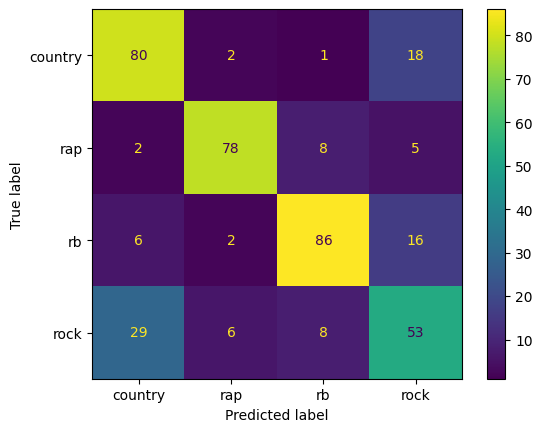

In [ ]:
for model in models:
    print(f'Accuracy: {model.accuracy}')
    print(f'F1:       {model.f1}')
    cf_matrix = confusion_matrix(model.y_test, model.y_pred)
    display = ConfusionMatrixDisplay(cf_matrix, display_labels=model.model.classes_)
    display.plot()
    plt.show()
    print()